# **Machine Learning Assignment**

The machine learning assignment consists of a series of exercises on logistic regression and tree-based models. It includes four main sections
1. data analysis (2.5 points)
2. logistic regression (6 points)
3. tree-based models (6 points)
4. comparison of the models (5.5 points)


The evaluation will take into consideration the following aspects
* the pertinence and accuracy of your answers.  The notebook should only include pertinent information. You will be penalized if you add a series of numerical results or figures without any justification. You need to select the most pertinent solution and comment on it.
* the quality of the answers. Imagine you are writing a technical report for your company to justify the machine learning solution that will be deployed. We will pay attention to the writing quality (full sentences, no major English grammatical errors, etc.).
* the quality of the notebook. We should be able to run it without modifying the code. The notebook should follow some good code practices (e.g., no code duplication).

*Note: in all this project, use **the value 1234** when you need to choose a value for a random state*


# Introduction

The dataset that you will analyse consists of sonar data. The aim is to distinguish between rocks and metal structures such as sea mines on the seafloor. 

Each pattern is a set of 60 numbers in the range of 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter *R* if the object is a rock and *M* if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

Please keep the same variable names, but update the name of your files from `sonar.csv` to `sonar_X.csv` (e.g., `X=1`).

In [2]:
# Load librairies
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
import sklearn
from sklearn.model_selection import train_test_split
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from numpy import arange
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [3]:
# Load the datasets
sonar = pd.read_csv("./data/sonar_03.csv", header=None)  

In [4]:
# Define the features and the target
target = sonar.loc[:,60] # The response variable to consider
features = sonar.loc[:,0:59] # The predictors/features used to predict the target

# 1. Data analysis

Before building several models that explain and predict the type of structure (mine vs. rock) based on sonar data, you need to visualize the data and perform a descriptive analysis of the data to get to grips with the data.

a) Have a first look at the dataset by displaying the 5 first individuals and the 5 last ones. Then, answer the following questions. 
- How many predictors are there? How many individuals are there?
- What is the type of the predictors (numerical/categorical)? What is the type of the target variable? So what kind of statistical learning problem is it (classification/regression problem)?

*For each question, your answers must be justified by an analysis you have performed. For instance, you can use a specific Python function and based on the output of this function you can answer the question and write a clear answer in the dedicated window.*

**Expected answer**: code and comment

In [5]:
print("First 5 Individuals", '\n', features.head())
print("Last 5 Individuals", '\n', features.tail())
print("Targets", '\n', target)

First 5 Individuals 
        0       1       2       3       4       5       6       7       8   \
0  0.0886  0.1755  0.1758  0.1540  0.0512  0.1805  0.4039  0.5697  0.6577   
1  0.3657  0.3809  0.5929  0.6299  0.5801  0.4574  0.4449  0.3691  0.6446   
2  0.6687  0.8647  0.9361  0.9367  0.9144  0.9162  0.9311  0.8604  0.7327   
3  0.4765  0.6254  0.7304  0.8702  0.9349  0.9614  0.9126  0.9443  1.0000   
4  0.2394  0.3134  0.4077  0.4529  0.4893  0.5666  0.6234  0.6741  0.8282   

       9   ...      50      51      52      53      54      55      56  \
0  0.7474  ...  0.0939  0.0972  0.2535  0.3127  0.2192  0.2621  0.2419   
1  0.8940  ...  0.0531  0.0343  0.1052  0.2120  0.1640  0.1901  0.3026   
2  0.5763  ...  0.0853  0.0447  0.1094  0.0351  0.1582  0.2023  0.2268   
3  0.9455  ...  0.1776  0.0997  0.1428  0.2227  0.2621  0.3109  0.2859   
4  0.8823  ...  0.0609  0.0131  0.0899  0.0922  0.1445  0.1475  0.2087   

       57      58      59  
0  0.2179  0.1159  0.1237  
1  0.2019  0.0

In [6]:
print("Targets", '\n', target)

Targets 
 0      M
1      R
2      M
3      M
4      R
      ..
203    R
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [7]:
print("Number of Predictors = ", features.shape[1])
print("Number of individuals = ", features.shape[0])

Number of Predictors =  60
Number of individuals =  208


##### COMMENT: 
The predictors in the sonar dataset are quantitative / numerical while the target variable are qualitative/categorical and binary in nature. This is therefore a classfication problem. 

b) We will now split the data. Use the Scikit-Learn functionalities to split your data into train (65 %) and test (35 %) sets.

**Expected answer**: code

In [8]:
X = features
Y = target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=1234)

c) Now, perform a brief descriptive analysis of the train and test sets. For the numerical variables, give a statistic summary that provides at least: mean, std, min, max, and count. For the categorical variable, display the frequency table. Are there some missing data? If yes, for each variable with missing data, give the number of missing data. Please write your answer in the window below.

**Expected answer**: code and comment


In [31]:
print("Descriptive Statistics of x_train:", '\n', x_train.describe(include='all'))
print("Descriptive Statistics of x_test:", '\n', x_test.describe(include='all'))

Descriptive Statistics of x_train: 
                0           1           2           3           4           5   \
count  135.000000  135.000000  135.000000  135.000000  135.000000  135.000000   
mean     0.406876    0.449373    0.511244    0.562763    0.605156    0.622272   
std      0.256903    0.256711    0.252263    0.261989    0.263957    0.266933   
min      0.034900    0.037500    0.049400    0.065600    0.051200    0.021900   
25%      0.201850    0.242850    0.303100    0.342350    0.381350    0.392950   
50%      0.306800    0.371500    0.447400    0.543000    0.595800    0.670800   
75%      0.651450    0.679100    0.741750    0.809750    0.818050    0.850400   
max      1.000000    1.000000    0.984300    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  135.000000  135.000000  135.000000  135.000000  ...  135.000000   
mean     0.639572    0.663501    0.673379    0.704132  ...    0.122214   
std      0.

In [32]:
print("Descriptive Statistics of y_train:", '\n', y_train.describe(include='all'))
print("Descriptive Statistics of y_test:", '\n', y_test.describe(include='all'))

Descriptive Statistics of y_train: 
 count     135
unique      2
top         M
freq       73
Name: 60, dtype: object
Descriptive Statistics of y_test: 
 count     73
unique     2
top        M
freq      38
Name: 60, dtype: object


In [11]:
print("Set of Missing Values in x_train:", x_train.isnull())
print("Set of Missing Values in x_test:", x_test.isnull())

Set of Missing Values in x_train:         0      1      2      3      4      5      6      7      8      9   \
92   False  False  False  False  False  False  False  False  False  False   
95   False  False  False  False  False  False  False  False  False  False   
188  False  False  False  False  False  False  False  False  False  False   
183  False  False  False  False  False  False  False  False  False  False   
149  False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
116  False  False  False  False  False  False  False  False  False  False   
204  False  False  False  False  False  False  False  False  False  False   
53   False  False  False  False  False  False  False  False  False  False   
38   False  False  False  False  False  False  False  False  False  False   
47   False  False  False  False  False  False  False  False  False  False   

     ...     50     51     52     53     

In [12]:
print("Set of Missing Values in y_train:", y_train.isnull())
print("Set of Missing Values in y_test:", y_test.isnull())

Set of Missing Values in y_train: 92     False
95     False
188    False
183    False
149    False
       ...  
116    False
204    False
53     False
38     False
47     False
Name: 60, Length: 135, dtype: bool
Set of Missing Values in y_test: 5      False
66     False
6      False
196    False
54     False
       ...  
101    False
61     False
99     False
134    False
20     False
Name: 60, Length: 73, dtype: bool


##### COMMENT: 
There are no missing values (null) in the training and test  datasets of both the X and Y.

d) Draw the pair-wise correlations between each feature. Comment.

**Expected answer**: code and comment

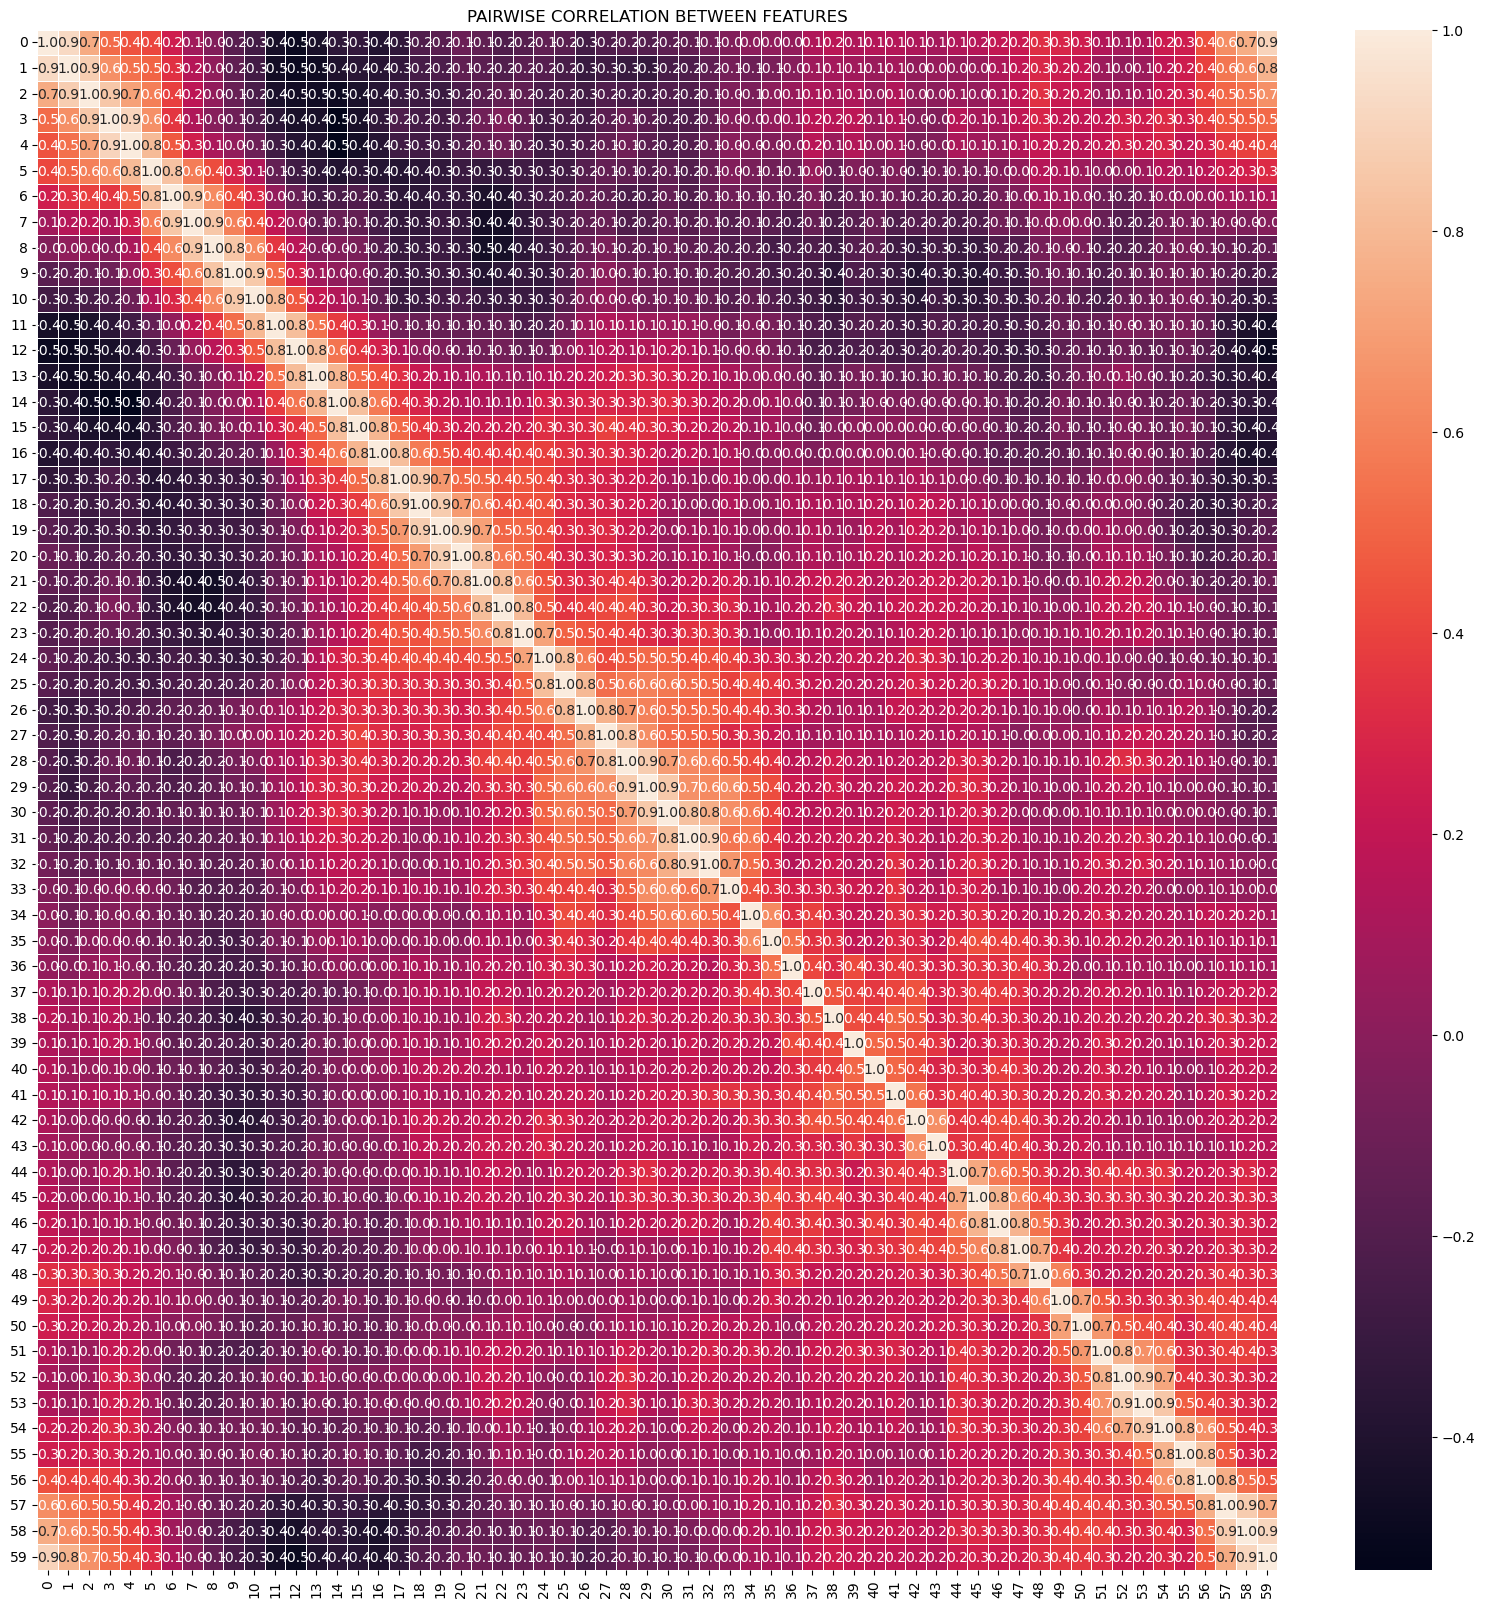

In [13]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(features.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('PAIRWISE CORRELATION BETWEEN FEATURES')
plt.show()

##### COMMENT: 
From the correlation plot, it is interesting to note that neighbouring features are more correlated to each other than others.

e) The goal of this assignment is to construct models that enable the distinction between rocks and metal structures based on sonar data. You will construct several models and at the end, you will keep only one model. What error function(s) can you use (MSE, classification error rate, RMSE, sensitivity, etc.) to measure and compare the performance of your models? Justify. If you think several evaluation criteria should be used, select the most pertinent one that you will use in the following sections.

**Expected answer**: comment


##### COMMENT: 
There are many classification error functions that can be used to  compatre the performances of classification models but I will propose using Confusion matrices and Accuracy Scores. If the weights of the target had varying importance, an F1 score might also be more appropriate than an Accuracy score but since the classification predicts rock or metals, I will propose an Accuracy Score.

f) Do you need to normalize the data? Justify your answer. And if yes, perform the normalisation.
Write your answer in the window below.

**Expected answer**: code (if needed) and comment

##### COMMENT: 

Although, the values of the features are of the same type/category (energy frequency) and within a range of order of magnitude between 0.0 to 1.0, it is still important to scale the data to ensure easy fitting of the test and train data.

In [14]:
scaler = StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

# 2. Logistic regression with Lasso regularization

In this section, you will train a logistic regression model using the Scikit-Learn library with a Lasso regularization. More specifically, you will use the [LogiticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

a) The first step is to instantiate an object for the LogisticRegression class. The constructor requires the definition of various parameters (e.g., `penalty`, `dual`, `tol`). Read carefully the documentation, and for each of them justify the values you will use.  
For example,
* "`random_state=1234`. I select the value `1234` because it is asked in the instructions of the assignment", or
* "`random_state` is let as its default parameter value because I did not use `sag`, `saga`, or `liblinear` `solver`, the `random_state` value as thus no influence".

If you think some parameter values need to be tuned (hyperparameters), indicate it. For example,
* "`random_state` is a hyperparameter, before tuning its value, I will use `random_state=1234`".


Please write your answer in the window below.

**Expected answer**: comment (see below)

* `penalty=...` because
* `dual=...` because
* etc.

##### COMMENTS 

- Penalty = "l1" : because L1 penalty is the Lasso Regularisation L1 norm (L1 or Manhattan norm) which the questions states 

- Dual = "false" (default): because the dual formulation is only implemented in l2 (ridge regularisation) 

- Tol = "0.0001"(default): tol defines the tolerance for stopping criteria. Its a hyperparameter than can be tuned but 0.0001 is a good value

- C = "0.1": is  a hyperperrameter that needs tuning to get the best value. It specifies the regularisation strength which is a hyperparameter that controls the importance of the regularisation term. C is the inverse of (lambda). It must be greater than zero, but the smaller the value of C here, the stronger the regularisation strength because it is the inverse of lambda. As a start, I will choose 0.1.

- fit_intercept = "True" (default): because it specifies if a bias/beta0/y-intercept should be used or not and yes, it should be used

- class_weight= None (default): because the target classes should have a equal weight of 1

- random_state= "1234" : The instruction says the seed value should be 1234

- solver = "saga" because Saga (Stochastic Average Gradient Accelerated Method) is implemented here for large datasets and for ‘elasticnet’,‘l2' and ofcourse lasso (l1) regularisation types. It is also expected to be faster than SAG (Stochastic Average Gradient Descent) since it is an extension.

- max_iter = "10000". This determines the max number of iteraions to be performed in the model to get the optimal parameter. The default value is 100, but it might be too small. I think this parameter needs to be tuned to get the optimum number of iteration for convergence, cos there is usually a trade off between runtime and quality solution.

- multi_class = "ovr" With a solver of saga, because the target label is binomial.

- verbose = 0 (default) because I used the saga solver algorithm

- warm_start = "True". Because I want to reuse the solution of the previous call to fit as initialization

- n_job- -1. Which means use all CPU processors.

- l1_ratio =None (default) because penalty is l1

b) Using your answer to question 2.a, create your first LogisticRegression model regularised by Lasso. Fill in the code below. For each hyperparameter, choose a value that you find pertinent.

**Expected answer**: code

In [26]:
log_lasso = LogisticRegression(penalty='l1', tol=0.0001, C=0.1, random_state=1234, solver='saga', multi_class='ovr', n_jobs=-1,  max_iter=10000, warm_start=True)

c) Fit a logistic regression model to explain the target by the explanatory variables and then compute the performance of this model on the training and testing sets by using the criterion chosen in *`question 1.c)`*. Comment on the results.

**Expected answer**: code and comment

In [27]:
log_lasso.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, multi_class='ovr', n_jobs=-1,
                   penalty='l1', random_state=1234, solver='saga',
                   warm_start=True)

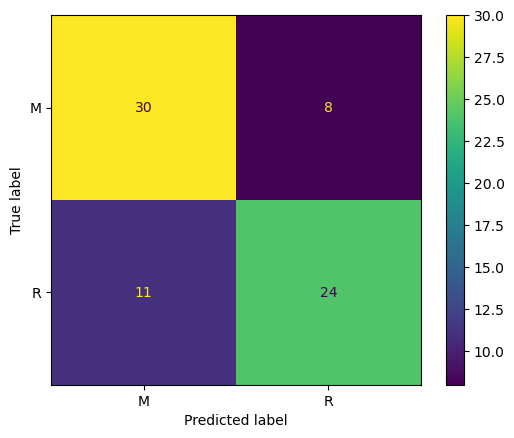

In [38]:
#make predictions
yhat_log_lasso= log_lasso.predict(X_test)

#compute confusion matrix of the model
conf_log_lasso = confusion_matrix(y_test,yhat_log_lasso)

#display confusion matrix of prediction
conf_log_lasso_display = ConfusionMatrixDisplay(conf_log_lasso,display_labels=log_lasso.classes_)
conf_log_lasso_display.plot() 


In [29]:
#compute Accuracy Scores on the training and test sets
train_accuracy_log_lasso=log_lasso.score(X_train, y_train)
test_accuracy_log_lasso= log_lasso.score(X_test, y_test)

#print accuracy scores
print("Log_lasso  Accuracy Score on Training Set:", train_accuracy_log_lasso )
print("Log_lasso  Accuracy Score on Test Set:", test_accuracy_log_lasso )

Log_lasso  Accuracy Score on Training Set: 0.8296296296296296
Log_lasso  Accuracy Score on Test Set: 0.7397260273972602


##### COMMENT: 
An accuracy score of 74% is good but can be better. This means that the variance is high (overfitting) and should be reduced to increase the accuracy on the test datasets. From the look of things, the The C value is rather too small and hence has a minimal effect on the coefficients in the cost function making the classification error higher than it should.  

d) Among all the hyperparameters, which one according to you is the most important? Justify your answer. Explain the role of this hyperparameter and how it will influence the results if its value increases/decreases. How this parameter was defined in the course content?

**Expected answer**: comment

##### COMMENT : The hyperparameter that is most important is the C.
The C hyperparameter here specifies the strength of the lasso regularisation. However, it is computed in this case as the inverse of lambda. This suggests that when the lambda is high, the C value is low. In the case when lambda is high, the lasso regularisation effect is higher on the coefficients and might tend to 0 thereby shrinking the features only to the most relevant and discarding the less important features (l1-norm). This is the inverse case for C. Hence, smaller values of C has a higher lasso regression effect that larger values of C. The C value (and lambda) must however be greater than 0 else there is no regularisation effect.


e) Implement a cross-validation procedure by using Scikit-Learn functionalities to tune the value of this hyperparameter. Justify the whole procedure (e.g., range of the values used for the cross-validation)

**Expected answer**: code and comment

In [36]:
#define a grid parameter dictionary using  a give range
grid = dict()
grid['C'] = arange(0, 1, 0.01)
search = GridSearchCV(estimator=LogisticRegression(penalty='l1', tol=0.0001, random_state=1234, solver='saga', max_iter=10000), param_grid=grid, scoring='accuracy', cv=5, n_jobs=-1)
results = search.fit(X_train, y_train)
print("Best Accuracy Score After Grid Search", results.best_score_)
print("Best 'C' value After Grid Search",results.best_params_)

Best Accuracy Score After Grid Search 0.7703703703703704
Best 'C' value After Grid Search {'C': 0.51}


##### COMMENTS:

The range of C values chosen was between 0 and 10. 
First, C must be greater than 0. I could have stopped at 1 but that will cause an overfitting case because it means all the coefficients will maintain their usual values and making it just a  logistic regression with no penalty hence a case of overfiutting is very possible ( and this was also experimented). 
Second, the higher the value of C,  the less the  strength of the regularisation penalty because of its inverse relarionship with lambda. This was confirmed with some experimentation  as the best C value (and accuracy) did not change when the range was increased to 0-20 and 0-30 respectively. AFter trying out some ranges I decided to stick with a range of between 0 and 1 for easy visaulisation because the best value also remained constant nonetheless.
The range 0-1 ended up being my optimal range of values it explains the penalty effect.

f) Look at how the model parameters change as a function of the hyperparameter. Determine the best possible visualization and comment on the figure you obtained

**Expected answer**: code and comment

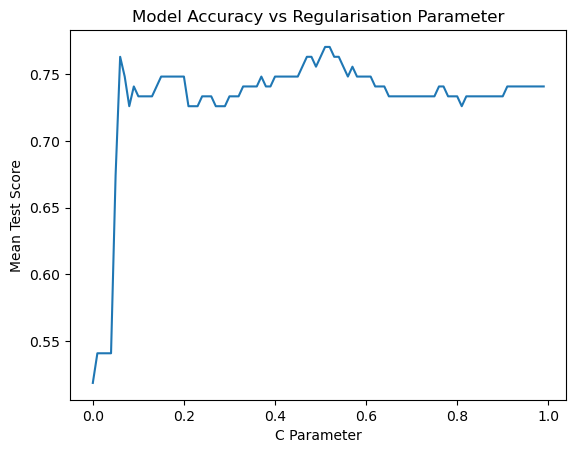

In [37]:
meanTestscore=results.cv_results_['mean_test_score']

plt.plot(grid['C'],meanTestscore )
plt.title("Model Accuracy vs Regularisation Parameter")
plt.xlabel("C Parameter")
plt.ylabel("Mean Test Score")
plt.show()

##### COMMENT: The graph shows how the mean test score increases as C parameter increases. Based on the range of C values (0-1) which was selected because higher values did not change neither the accuracy of the model nor the C parameter. It is clear that the best test score is gotten using the penalty strength of 0.5

g) Train a model with the best possible configuration (justify the configuration) *`log_lasso_opt`*. Measure its performance on both the train set and the test set by using the criterion chosen in *`question 1.c)`*. Comment on the results you get. This model will be used in section 4 and compare with a decision tree-based model.

**Expected answer**: code and comment

In [40]:
#Train model with new best parameters
log_lasso_opt = LogisticRegression(penalty='l1', tol=0.0001, C=0.51, random_state=1234, solver='saga', multi_class='ovr', n_jobs=-1,  max_iter=10000)

#fit the  model to the training set to learn from it
log_lasso_opt.fit(X_train, y_train)

#make prediction using the trained model
yhat_log_lasso_opt= log_lasso_opt.predict(X_test)



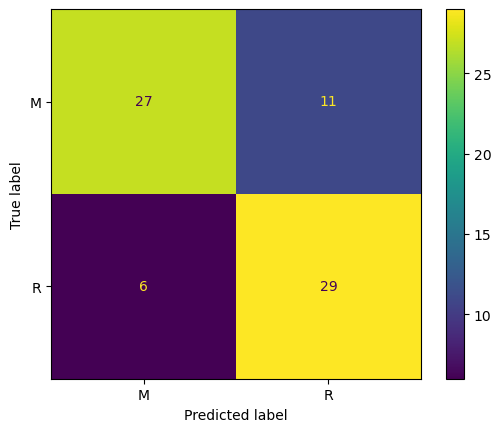

In [41]:

#compute confusion matrix of the model
conf_log_lasso_opt = confusion_matrix(y_test,yhat_log_lasso_opt)

#display confusion matrix of prediction
conf_log_lasso_opt_display = ConfusionMatrixDisplay(conf_log_lasso_opt,display_labels=log_lasso_opt.classes_)
conf_log_lasso_opt_display.plot() 


In [42]:
#compute Accuracy Scores on the training and test sets
train_accuracy_log_lasso_opt=log_lasso_opt.score(X_train, y_train)
test_accuracy_log_lasso_opt= log_lasso_opt.score(X_test, y_test)

#print accuracy scores
print("log_lasso_opt  Accuracy Score on Training Set:", train_accuracy_log_lasso_opt)
print("log_lasso_opt  Accuracy Score on Test Set:", test_accuracy_log_lasso_opt)

log_lasso_opt  Accuracy Score on Training Set: 0.9185185185185185
log_lasso_opt  Accuracy Score on Test Set: 0.7671232876712328


##### COMMENT: It's interesting that the difference in accuracy between the optimal model and the former model on the test set is only about 3% which is not so significant in my opinion. But on the training set, the accuracy increased by almost 10% which means the model does not generalise well enough hence an overfitted model.

# 3. Decision tree and random forest

In this section, you will train two random forests using the Scikit-Learn library.

a) First, construct a random forest named *`rf_1`*. More specifically, you will use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) class or the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) class. The constructor requires the definition of various hyperparameters. Read carefully the documentation and justify the values you will use for the hyperparameters (like in `question 2.a)`). What is the main hyperparameter other than `n_estimators` to tune?

**Expected answer**: code and comment

Write below your justification for the values chosen for the hyperparameters and the name of the most important hyperparameter:

##### COMMENT: Justification of Hyperparameters

*The most important hyperparameter is max_features because it differentiates it from ordinary bagging by randomly selecting model predictors* 

- max_features='sqrt': this is the the number of features randomly selected when splitting a node. The square root of 'd' (the number of features to be considered when splitting to get the best split) is often used for classification. SQRT is preferred over log2 because the obb error is lower than in the log2 as the number of tree increases. It is also the main hyperparameter to be tuned other than the n_estimator because it ”slighlty controls” the bias-variance tradeoff for the forest.  TIt is tuned using the out-of-bag sampling to get the optimal value

- warm_start=True; to reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. The warm start set to True disables support for parallelized ensembles but is necessary for tracking the OOB

- n_estimators=100: this specifies the number of trees, its an hyperparameter that needs to be tuned.

- criterion='gini'(default): because Gini impurity function is a recommended metric for classification trees rather than misclassification error.

- max_depth=None: nodes are expanded until purity is attained (since it is random forest, averaging takes care of the overfitting issues)

- ccp_alpha=0.0: cos there is no prunning involved in the random forest

- bootstrap=True: 

- n_jobs = -1: to use all processors

- oob_score=True: to use out-of-bag samples to estimate the generalization score.

- random_state=1234: as instructed

In [59]:
rf_1 = RandomForestClassifier(n_estimators=100, max_features='sqrt',oob_score=True, warm_start=True, random_state=1234)
rf_1.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1234, warm_start=True)

b) Compute the oob error of *`rf_1`*. What does it represent? Comment on the result.

**Expected answer**: code and comment

In [61]:
print("OOB ERROR:", 1-rf_1.oob_score_)

OOB ERROR: 0.20740740740740737


##### COMMENT:

The OOB score of the random forest model is the average of the out-of-bag error over all the trees of the forest. The out of bag score gives the accuracy while the out of bag error is 1-obb score. Hence, the higher the obb score, the higher the model accuracy.

c) Proposed a strategy based on the oob error to select a suitable value of *`n_estimators`*. Based on your tuning strategy, what value for `n_estimators` do you choose?  
Write below a brief explanation of the strategy that you suggest.

**Expected answer**: code and comment

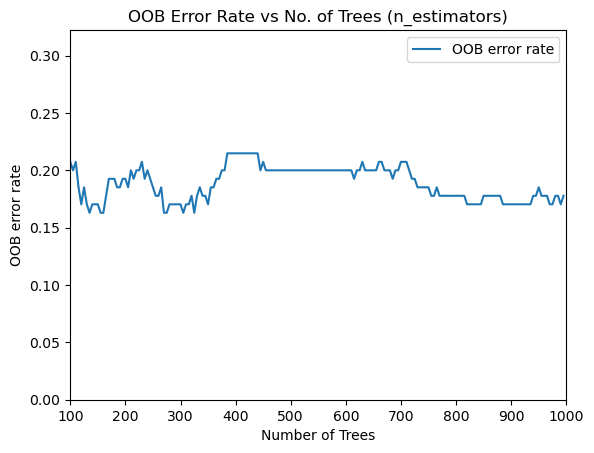

In [62]:
error_rate = []
min_est = 100
max_est = 1000
step=5
estimators = range(min_est, max_est, step)

for i in estimators:
    rf = RandomForestClassifier(n_estimators=i, max_features='sqrt',random_state=1234, oob_score=True, warm_start = True)
    rf.fit(X_train, y_train)
    
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)
             
plt.plot(estimators, error_rate, label="OOB error rate")
plt.title("OOB Error Rate vs No. of Trees (n_estimators)")
plt.ylim(0, 1.5*max(error_rate)) 
plt.xlim(min_est, max_est)
plt.xlabel("Number of Trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()  

#### COMMENT: 
To select the best value of the n_estimators,  visualising the error rate against the number of trees was used. And with this, the number of trees which has a stable error is chosen. From the graph illustration, the OOB error of the forest is stable at between 400-600 trees

d) Run a 5-times cross-validation procedure by using Scikit-Learn functionalities (i.e. cross-validation is repeated 5 times) to tune the value of the main hyperparameter in the random forest algorithm.

**Expected answer**: code


In [76]:
grid_param = {'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 'n_estimators':[400,600,800]}
repeatKfold=5
results_cv=pd.DataFrame()
rf = RandomForestClassifier()
for i in range(repeatKfold):
    rf_cv = GridSearchCV(rf,grid_param, cv=5,n_jobs=-1)
    rf_cv.fit(X_train, y_train) 
    if i==0: 
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"] 

results_cv["mean_test_score"]=results_cv["mean_test_score"]/repeatKfold
results_cv["std_test_score"]=results_cv["std_test_score"]/repeatKfold



ind_best=results_cv["mean_test_score"].idxmax()
print("Best Parameters", results_cv["params"].iloc[ind_best])
print("Best Accuracy Score",  results_cv["mean_test_score"].iloc[ind_best])
print("Best Standard Deviation", results_cv["std_test_score"].iloc[ind_best])


Best Parameters {'max_features': 0.4, 'n_estimators': 400}
Best Accuracy Score 0.8192592592592594
Best Standard Deviation 0.03949132844184668


e) Construct a random forest with the tuned parameters. This forest is named *`rf_opt`*. Measure its performance on both the train set and the test set by using the criterion chosen in *`question 1.c)`*. Comment on the results you get.

**Expected answer**: code and comment


In [77]:
rf_opt = RandomForestClassifier(n_estimators=400, max_features=0.4,oob_score=True, warm_start=True, random_state=1234)
rf_opt.fit(X_train, y_train)
yhat_rf_opt= rf_opt.predict(X_test)

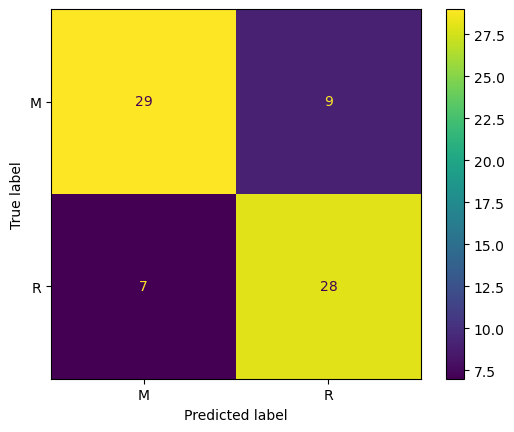

In [80]:
#compute confusion matrix of the model
conf_rf_opt = confusion_matrix(y_test,yhat_rf_opt)

#display confusion matrix of prediction
conf_rf_opt_display = ConfusionMatrixDisplay(conf_rf_opt,display_labels=rf_opt.classes_)
conf_rf_opt_display.plot() 

In [81]:
#compute Accuracy Scores on the training and test sets
train_accuracy_rf_opt=rf_opt.score(X_train, y_train)
test_accuracy_rf_opt= rf_opt.score(X_test, y_test)

#print accuracy scores
print("rf_opt  Accuracy Score on Training Set:", train_accuracy_rf_opt)
print("rf_opt  Accuracy Score on Test Set:", test_accuracy_rf_opt)

rf_opt  Accuracy Score on Training Set: 1.0
rf_opt  Accuracy Score on Test Set: 0.7808219178082192


##### COMMENT: 
With an accuracy of 100% on the training set, and a 78% accuracy on the test, meaning it has a high variance and low bias (overfitted on the training set). Also, contrary to the accuracy result from the cross validation  which was 81%, using the best values form the cross validation to train the rf_opt model did not give an accuarcy of up to 81% as expected. 

f) Now, what are the 5 most important features in *`rf_opt`*? Your answer must be based on the use of an appropriate criterion. Explain what is this criterion.

**Expected answer**: code and comment


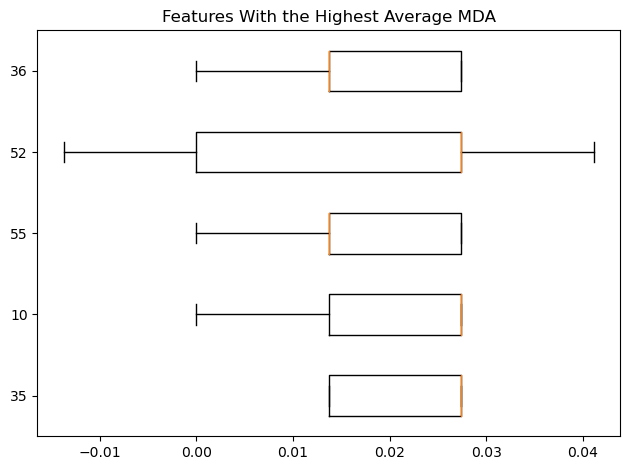

In [85]:
result_perm_rf_opt = permutation_importance(rf_opt, X_test, y_test, n_repeats=5, random_state=1234, n_jobs=-1)

sorted_idx = result_perm_rf_opt.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:5]
 
fig, ax = plt.subplots()
ax.boxplot(result_perm_rf_opt.importances[invert_sorted_idx].T,vert=False, labels=features.columns[invert_sorted_idx])
ax.set_title("Features With the Highest Average MDA")
fig.tight_layout()
plt.show()

The 5 most important features based on the Mean Deacrease in Accuracy are Features 36, 52, 55, 10 and 35.

##### COMMENT:
The criterion used to measure the most important features for feature selection is the Mean Decrease in Accuracy (MDA) implemented using the permutation importance function in sklearn. The permutation importance function according to the documentation is defined to be the decrease in a model score when a single feature value is randomly shuffled.
The permutation feature importance is better to measure the feature importance (MDA) compared to the Random Forest Feature Importance (MDI) because the MDI which is impurity-based feature importance can inflate the importance of numerical features.

g) Imagine you are asked to construct an additional random forest with only the subset of 5 features selected in *`question 3.i)`*. Could you please give in order the several steps to perform to build this new forest?  

*Indication: in your answer, you enumerate each step of the construction and in a sentence, you give the objective of each step. For example for a logistic regression model, the steps could be:* 
- Step 1 "..*a title of the step*..": it consists in .... 
- Step 2 "..*a title of the step*..":
- etc.

Please write your answer below.

**Expected answer**: comment


#### COMMENT

- Step 1 - Create a data subset with ONLY the 5 most important features: The aim of this step is to discard all other 55 features used for the previous model and work with the 5 most important features as predictors in the new model.

- Step 2 - Create a new random forest classifier for the most important features: IIn this step, a new random forest classifier is build and configured using the best parameters discovered earlier. 

- Step 3 - Train the new random forest classifier on the new dataset containing the most important features:  Now that the classifier has been configured rightly, in this step the random forest model is used to train the new dataset.

- Step 4- Make Prediction: Using the trained model in step 3, in this step you make prediction using the test data. 

- Step 3: Compute the accuracy and the confusion matrix. To measure the accuracy of the new model, the confusion matrix and accuracy score is computed.


## 4. Model comparison

a) Display the confusion matrix computed on the test set for the *`log_lasso_opt`* and *`rf_opt`*. Compare the results.

**Expected answer**: code and comment


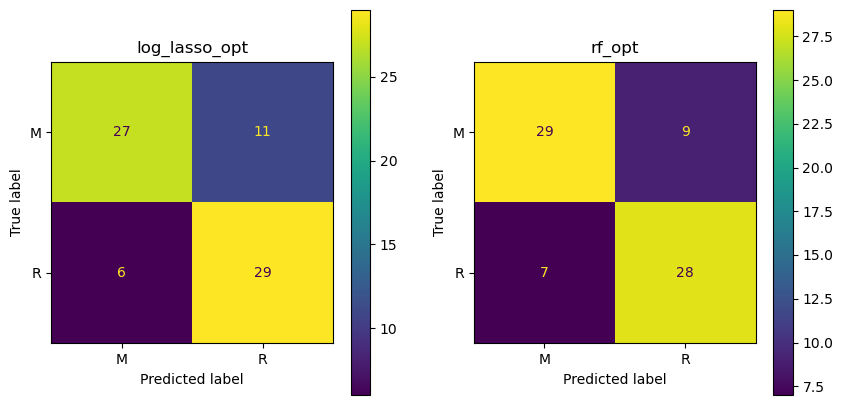

In [86]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("log_lasso_opt")
ax[1].set_title("rf_opt")
    
ConfusionMatrixDisplay(conf_log_lasso_opt,display_labels=log_lasso_opt.classes_).plot(ax=ax[0])
ConfusionMatrixDisplay(conf_rf_opt,display_labels=rf_opt.classes_).plot(ax=ax[1])

Write below your comments:

##### COMMENT:
From the confusion matrix, it can be seen that the rf_opt model classified more labels correctly (True Positives and True Negatives) by a small margin of just 1 as seen on the right. Also, the proportion of wrongly classified labels (False Negatives and False Positives) is greater in the log_lasso_opt model than the rf_opt by 1 label. In my opinion, the confusion matrix does not give a clear justification on which model is better because of this slightly little almost negligible misclassification.

b) Compare the test performance of the two models you built based on the criterion chosen in *`question 1.c)`*. 

**Expected answer**: code and comment


In [102]:
#log_lasso_opt accuracy score
test_accuracy_log_lasso_opt= log_lasso_opt.score(X_test, y_test)
print("log_lasso_opt  Accuracy Score on Test Set:", test_accuracy_log_lasso_opt*100)

#rf_opt
test_accuracy_rf_opt= rf_opt.score(X_test, y_test)
print("rf_opt  Accuracy Score on Test Set:", test_accuracy_rf_opt*100)


log_lasso_opt  Accuracy Score on Test Set: 76.71232876712328
rf_opt  Accuracy Score on Test Set: 78.08219178082192


Write below your comments:

Using the accuracy score as a comparison metric between the log_lasso_opt and the rf_opt models is a better metric because the difference in classification accuracy can be seen as a percentage. 
The Accuracy score is $True Positives +True Negatives  /  Total Observations$

c) Compare the features included in the logistic model *`log_lasso_opt`* and the most important features in the forest *`rf_opt`*. Comment.

**Expected answer**: code and comment

Text(0.5, 1.0, 'rf_opt')

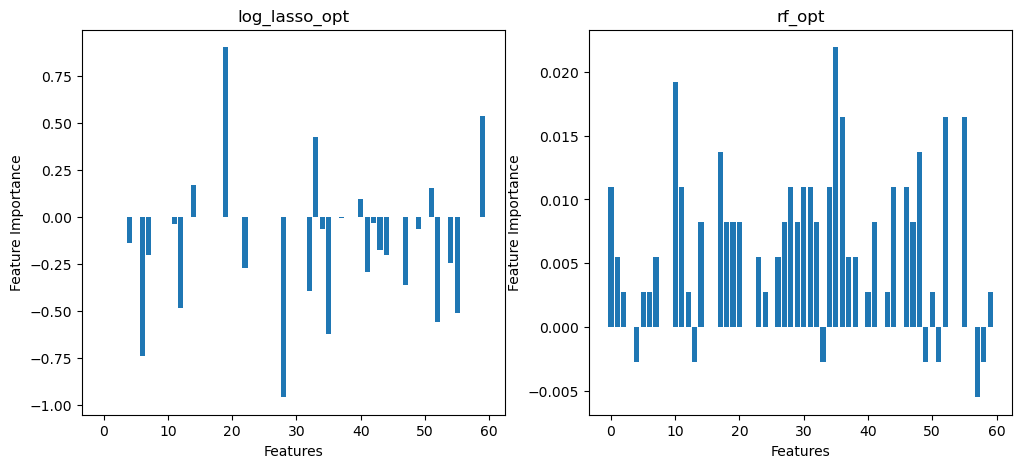

In [160]:
important_features_log_lasso_opt=pd.DataFrame(data={'Feature': features.columns, 'Importance':log_lasso_opt.coef_[0]})
important_features_rf_opt=pd.DataFrame(data={'Feature': features.columns, 'Importance':result_perm_rf_opt['importances_mean']})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(important_features_log_lasso_opt['Feature'], important_features_log_lasso_opt['Importance'] )
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("log_lasso_opt")

plt.subplot(1, 2, 2)
#plt.bar(important_features_rf_opt['Feature'], important_features_rf_opt['Importance'] )
plt.bar(important_features_rf_opt['Feature'], important_features_rf_opt['Importance'] )

plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("rf_opt")


Write below your comments:

**Your answer**:
Comparing the log_lasso_opt model and rf_opt model, the important features considered by the lasso penalty in the log_lasso_opt model is different from the important features in the rf_opt model according to the mean decrease in accuracy using permutations. The five most important features in the log_lasso_opt model are features 19, 29, 6, 35, 55 and 52  while the five most important features in the rf_opt model are features 36, 52, 55, 10 and 35. However, features 55, 52 and 35 are ranked important in both models. 

d) Select a final model. Justify.

**Expected answer**: comment

##### COMMENT:
My final model is the rf_opt model because it has a better accuracy than the lasso regression model so far, I cannot say if it is exactly better because from my experiments, the difference in accuracy is not so much but based on the accuracy score which is higher than that of the log_lasso_opt model( though it was expected to be way higher ), I will  have to choose the rf_opt as my final model

e) If you had more hours to work on the logistic and random forest models, what are the other experiments you will conduct?

**Expected answer**: comment

##### COMMENT:
If I had more time, I will work on improving the accuracy of my random forest model from 78% because it can definitely be improved possibly through  ore cross validation. I will also use ridge penalty for the logistic regression model and compare results. 